In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import random

In [6]:
# Exercise 9.01: The law of large numbers
# 1.
random.seed(54321)

In [33]:
# 2.
sample_size = 1000

In [35]:
# 3.
random.seed(54321)
result_list = [random.randint(0, 1) for i in range(sample_size)]

In [36]:
# 4.
num_heads = sum(result_list)
avg_heads = float(num_heads) / sample_size

In [37]:
# 5.
print(f'Results: {num_heads} heads out of {sample_size} flips')
print(f'Average number of heads per flip is {avg_heads}.')

Results: 492 heads out of 1000 flips
Average number of heads per flip is 0.492.


In [38]:
# Exercise 9.02 - Coin flipping average over time
# 2.
sample_size = 20000

In [40]:
# 3.
num_heads = 0
heads_list = []
trials_list = []
freq_list = []

In [41]:
# 4.
for i in range(1, sample_size + 1):
    result = random.randint(0, 1)
    if result == 1:
        num_heads += 1
    avg_heads = float(num_heads) / i
    heads_list.append(num_heads)
    trials_list.append(i)
    freq_list.append(avg_heads)

In [43]:
# 5.
print(f'Results: {num_heads} heads out of {sample_size} flips')
print(f'Average number of heads per flip is {avg_heads}.')

Results: 10001 heads out of 20000 flips
Average number of heads per flip is 0.50005.


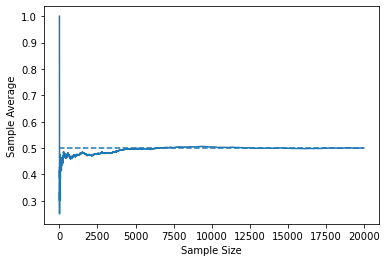

In [47]:
# 6.
plt.plot(trials_list, freq_list)
plt.ylabel("Sample Average")
plt.xlabel("Sample Size")
plt.hlines(0.5, 0, sample_size, linestyle = "dashed")
plt.show()

In [91]:
# Exercise 9.03: Calculate the average winnings for a game of roulette if we constanly bet on red.
# 2.
sample_size = 100000
bet = 1

In [97]:
# 3.
net_money = 0
wins = 0
money_track = []
trials_track = []
avg_money = []

In [98]:
# 4.
# random.seed(54321)
for i in range(1, sample_size +1):
    result = random.randint(1, 38)
    if result % 2 == 1 and result != 37:
        net_money += bet
        wins += 1
    else:
        net_money -= bet
    money_track.append(net_money)
    avg_money.append(net_money / i)
    trials_track.append(i)

In [99]:
# 5.
print(F'Won: {wins}, average win per game {net_money/sample_size}')
print(F'Expected return per game {((18/38)*bet + (20 / 38)*(-bet))}')

Won: 47410, average win per game -0.0518
Expected return per game -0.05263157894736842


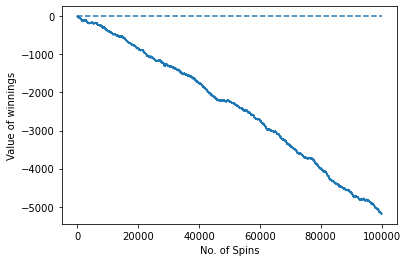

In [100]:
# 6.
plt.plot(trials_track, money_track)
plt.ylabel("Value of winnings")
plt.xlabel("No. of Spins")
plt.hlines(((18/38)*bet + (20 / 38)*(-bet)), 0, sample_size, linestyle = "dashed")
plt.show()

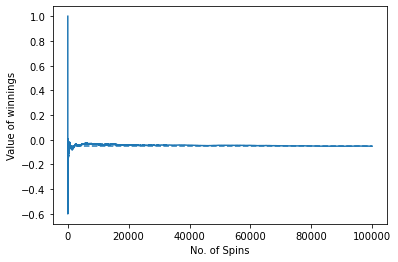

In [102]:
# 6.
plt.plot(trials_track, avg_money)
plt.ylabel("Value of winnings")
plt.xlabel("No. of Spins")
plt.hlines(((18/38)*bet + (20 / 38)*(-bet)), 0, bsample_size, linestyle = "dashed")
plt.show()

In [104]:
# Central Limit Theorem
# Exercise 9.04: Showing the sample mean for a uniform distribution
# 1.
import math

In [112]:
# 2.
sample_size = 70
calc_means = 100000

In [116]:
# 3.
mean_list = []
random.seed(54312)
for i in range(calc_means):
    sample_list = []
    for j in range(sample_size):
        sample_list.append(random.randint(0, 50))
    sample_mean = sum(sample_list) / sample_size
    mean_list.append(sample_mean)

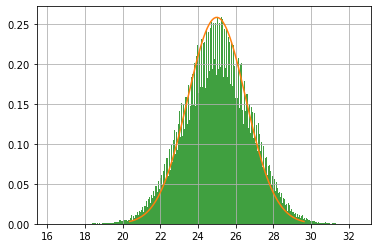

In [121]:
n, bins, patches = plt.hist(mean_list, math.floor(math.sqrt(calc_means)), density = True, facecolor = 'g', alpha = 0.75)
plt.grid(True)

mu = 25
sigma = math.sqrt((50 ** 2)/ 15)/ math.sqrt(sample_size)
x = np.linspace(mu -3 * sigma, mu + 3 * sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma))
plt.show()

In [129]:
# Exercise 9.05 - Taking a sample from an exponential distribution
# 1.
sample_size = 50
calc_means = 10000

In [130]:
# 2.
mean_list = []
random.seed(54312)
for i in range(calc_means):
    sample_list = []
    for j in range(sample_size):
        sample_list.append(np.random.exponential(1))
    sample_mean = sum(sample_list) / sample_size
    mean_list.append(sample_mean)

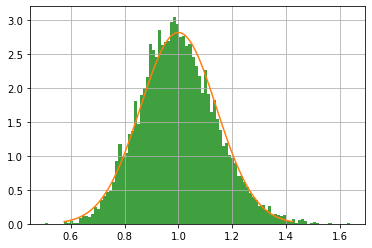

In [131]:
n, bins, patches = plt.hist(mean_list, math.floor(math.sqrt(calc_means)), density = True, facecolor = 'g', alpha = 0.75)
plt.grid(True)

mu = 1
sigma = 1 / (math.sqrt(sample_size))
x = np.linspace(mu -3 * sigma, mu + 3 * sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma))

In [134]:
# Confidence Intervals
import statistics as st
def z_confidence_interval(data, st_dev, con_lvl):
    sample_mean = st.mean(data)
    n = len(data)
    crit_value = stats.norm.ppf(((1 - con_lvl) / 2) + con_lvl)
    low = sample_mean - (crit_value * (st_dev / math.sqrt(n)))
    high = sample_mean + (crit_value * (st_dev / math.sqrt(n)))
    print(f'The {con_lvl} z confidence interval: {low}, {high}')
    return (low, high)

In [136]:
# Exercis 9.06: Finding the confidence interval of polling figures
#2.
random.seed(39809)

sample_list = []

for i in range(30):
    sample_list.append(random.randint(0, 10))
    
z_confidence_interval(sample_list, 2.89, 0.95)

The 0.95 z confidence interval: 3.965845784931483, 6.034154215068517


(3.965845784931483, 6.034154215068517)

In [142]:
# Small sample confidence intervals
def t_confidence_interval(data, con_lvl):
    sample_mean = st.mean(data)
    sd = st.stdev(data)
    n = len(data)
    
    crit_value = stats.t.ppf(((1 - con_lvl) / 2) + con_lvl, n - 1)
    low = sample_mean - (crit_value * (sd / math.sqrt(n)))
    high = sample_mean + (crit_value * (sd / math.sqrt(n)))
    
    print(f'The {con_lvl} z confidence interval: {low}, {high}')
    return (low, high)

In [143]:
t_confidence_interval(sample_list, 0.95)

The 0.95 z confidence interval: 3.827357936126168, 6.172642063873832


(3.827357936126168, 6.172642063873832)

In [144]:
# Confidence Interval Proportion
def prop_confidence_interval(p_hat, n, con_lvl):
    crit_value = stats.norm.ppf(((1 - con_lvl) / 2) + con_lvl)
    low = p_hat - (crit_value * math.sqrt((p_hat * (1 - p_hat))/ n))
    high = p_hat + (crit_value * math.sqrt((p_hat * (1 - p_hat))/ n))
    
    print(f'The {con_lvl} z confidence interval: {low}, {high}')
    return (low, high)

In [146]:
prop_confidence_interval(0.54, 350, 0.95)

The 0.95 z confidence interval: 0.4877856513683282, 0.5922143486316719


(0.4877856513683282, 0.5922143486316719)

In [147]:
# Hypothesis testing
import statsmodels.stats.weightstats as mod
import statsmodels.stats.proportion as prop

In [151]:
# Exercise 9.07: The z-test in action
def z_test(sample, pop_st_dev, hypoth_value, sig_level, test_type):
    sample_mean = st.mean(sample)
    szmple_size = len(sample)
    test_stat = (sample_mean - hypoth_value) / (pop_st_dev / math.sqrt(sample_size))
    
    if test_type == "lower":
        p_value = stats.norm.cdf(test_stat)
    if test_type == "upper":
        p_value = 1 - stats.norm.cdf(test_stat)
    if test_type == "two":
        p_value = 2 * (1 - stats.norm.cdf(abs(test_stat)))
    print(f'P Value: {p_value}')
    if p_value < sig_level:
        print(f'Results are significant. Reject the Null.')
    else:
        print(f'Results are not significant. Fail to reject the Null.')

In [234]:
#np.random.seed(12345)
data1 = np.random.normal(15, 1, 50)
z_test(data1, 1, 16, 0.05, 'lower')
data1

P Value: 2.1569487120200693e-16
Results are significant. Reject the Null.


array([13.4123523 , 16.00261604, 13.12898379, 16.07679179, 14.4117946 ,
       14.66148428, 14.76372638, 13.57238182, 13.50446095, 13.70927731,
       14.60591478, 14.04934314, 15.61953582, 14.80210315, 13.47667631,
       14.19945379, 14.60029363, 13.94764941, 15.22564751, 16.05494602,
       15.2155292 , 15.10589307, 14.20595206, 15.32527451, 15.3486012 ,
       15.49088069, 14.96101182, 15.78390845, 15.69135854, 15.1813089 ,
       13.43855185, 15.13585649, 15.34065271, 15.32532549, 16.06841107,
       17.61167817, 15.53306111, 14.68449833, 13.93312297, 16.49766685,
       14.4733908 , 13.80715938, 13.29181434, 15.65566109, 14.206531  ,
       15.08675364, 14.88870737, 15.87156265, 13.76111602, 15.76972761])

In [242]:
z_test(data1, 1, 14, 0.05, 'upper')

P Value: 9.121406963075174e-10
Results are significant. Reject the Null.


In [243]:
z_test(data1, 1, 15, 0.05, 'two')

P Value: 0.2899000851066498
Results are not significant. Fail to reject the Null.


In [247]:
results = prop.proportions_ztest(193, 350, 0.5, alternative = 'larger')
results

(1.93454148164361, 0.026523293494118718)

In [249]:
# 2- Sample T-Test / A-B Testing
# Exercise 9.09: A-B Testing example
np.random.seed(16172)
sample1 = np.random.normal(50, 10, 100)
sample2 = np.random.normal(100, 10, 100)

In [250]:
# 3.
two_tail = stats.ttest_ind(sample1, sample2, equal_var=False)
two_tail

Ttest_indResult(statistic=-33.72952277672986, pvalue=6.3445365508664585e-84)

In [252]:
upper_tail = stats.ttest_ind(sample2, sample1, equal_var=False)
upper_tail

Ttest_indResult(statistic=33.72952277672986, pvalue=6.3445365508664585e-84)

In [275]:
# Introduction To Linear Regression
# Exercise 9.10: Linear Regression
import sklearn.linear_model as lm
from mpl_toolkits import mplot3d

import statsmodels.api as sm      


In [261]:
# 1. 
data = pd.read_csv("./winequality-red.csv", header = 0, sep = ";")
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                     pH   R-squared (uncentered):                   0.634
Model:                            OLS   Adj. R-squared (uncentered):              0.634
Method:                 Least Squares   F-statistic:                              2772.
Date:                Fri, 19 Feb 2021   Prob (F-statistic):                        0.00
Time:                        06:41:02   Log-Likelihood:                         -3380.8
No. Observations:                1599   AIC:                                      6764.
Df Residuals:                    1598   BIC:                                      6769.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
citric acid     7.9114      0.150     52.649      0.000       7.617       8.206
==============================================================================
Omnibus:                      129.025   Durbin-Watson:                   0.915
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               62.411
Skew:                          -0.305   Prob(JB):                     2.80e-14
Kurtosis:                       2.248   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

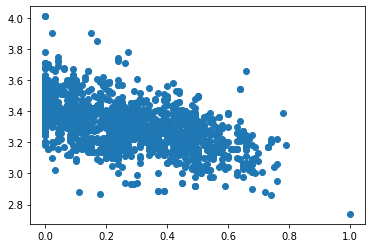

In [276]:
# 2.
data1 = data[['pH', 'citric acid']]
plt.scatter(x = data1['citric acid'], y = data1['pH'])

x = data1[['citric acid']]
y = data1[['pH']]

x_train1 = sm.add_constant(x)
lm_1 = sm.OLS(y, x).fit()
lm_1.summary()

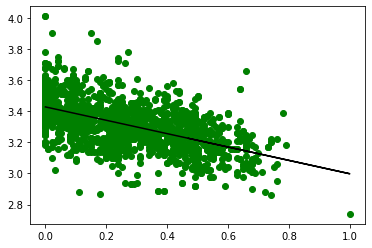

In [270]:
# 3.
model = lm.LinearRegression()
model.fit(x, y)

plt.scatter(x, y, color = 'g')
plt.plot(x, model.predict(x), color = 'k')
plt.show()

In [277]:
# 4
data2 = data[['pH', 'citric acid', 'residual sugar']]

y = data2[['pH']]
x = data2[['citric acid', 'residual sugar']]

model = lm.LinearRegression()
model.fit(x, y)

y_pred = model.predict(x)

x_train1 = sm.add_constant(x)
lm_1 = sm.OLS(y, x).fit()
lm_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                     pH   R-squared (uncentered):                   0.806
Model:                            OLS   Adj. R-squared (uncentered):              0.806
Method:                 Least Squares   F-statistic:                              3312.
Date:                Fri, 19 Feb 2021   Prob (F-statistic):                        0.00
Time:                        06:42:02   Log-Likelihood:                         -2875.0
No. Observations:                1599   AIC:                                      5754.
Df Residuals:                    1597   BIC:                                      5765.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
citric acid        3.2386      0.166     19.532      0.000       2.913       3.564
residual sugar     0.7154      0.019     37.544      0.000       0.678       0.753
==============================================================================
Omnibus:                      925.324   Durbin-Watson:                   1.280
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            11114.151
Skew:                          -2.485   Prob(JB):                         0.00
Kurtosis:                      14.921   Cond. No.                         13.3
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

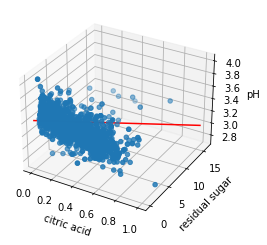

In [272]:
threedee = plt.figure().gca(projection='3d')
threedee.scatter(data2['citric acid'],
data2['residual sugar'],data2['pH'])
threedee.set_xlabel('citric acid')
threedee.set_ylabel('residual sugar')
threedee.set_zlabel('pH')
xline = np.linspace(0, 1, 100)
yline = np.linspace(0, 16, 100)
zline = xline*(-0.429) + yline*(-0.000877)+3.430
threedee.plot3D(xline, yline, zline, 'red')
plt.show()

In [308]:
# Activity 9.01: Standardized Test Performance
data = pd.read_csv("./pisa_test_scores.csv")
import seaborn as sns

In [309]:
#1.
print(data.head())
print(data.describe())
print(data.info())

  Country Code  internet_users_per_100      Math   Reading   Science
0          ALB               63.252933  413.1570  405.2588  427.2250
1          ARE               90.500000  427.4827  433.5423  436.7311
2          ARG               68.043064  409.0333  425.3031  432.2262
3          AUS               84.560519  493.8962  502.9006  509.9939
4          AUT               83.940142  496.7423  484.8656  495.0375
       internet_users_per_100        Math     Reading     Science
count               70.000000   70.000000   70.000000   70.000000
mean                71.973099  460.971557  460.997291  465.439093
std                 16.390632   53.327205   49.502679   48.397254
min                 21.976068  327.702000  346.549000  331.638800
25%                 60.899020  417.416075  426.948625  425.923375
50%                 72.999350  477.607150  480.199850  475.400050
75%                 85.026763  500.482925  499.687475  502.431250
max                 98.200000  564.189700  535.100200  555

array([<AxesSubplot:title={'center':'Science'}>], dtype=object)

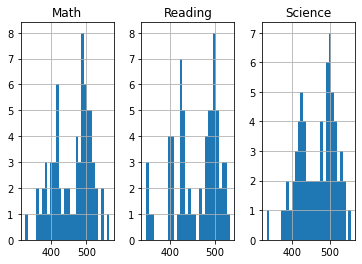

In [296]:
datax = data[['Math', 'Reading', 'Science']]
fig, axes = plt.subplots(1, 3)

datax.hist('Math', bins=30, ax=axes[0])
datax.hist('Reading', bins=30, ax=axes[1])
datax.hist('Science', bins=30, ax=axes[2])

In [297]:
# Small sample confidence intervals
def t_confidence_interval(data, con_lvl):
    sample_mean = st.mean(data)
    sd = st.stdev(data)
    n = len(data)
    
    crit_value = stats.t.ppf(((1 - con_lvl) / 2) + con_lvl, n - 1)
    low = sample_mean - (crit_value * (sd / math.sqrt(n)))
    high = sample_mean + (crit_value * (sd / math.sqrt(n)))
    
    print(f'The {con_lvl} z confidence interval: {low}, {high}')
    return (low, high)

t_confidence_interval(data['Math'], 0.95)
t_confidence_interval(data['Reading'], 0.95)
t_confidence_interval(data['Science'], 0.95)

The 0.95 z confidence interval: 448.2561338314995, 473.6869804542148
The 0.95 z confidence interval: 449.1937943789569, 472.80078847818595
The 0.95 z confidence interval: 453.8991748650865, 476.9790108491992


(453.8991748650865, 476.9790108491992)

In [305]:
# 2.
data1 = data[data['internet_users_per_100'] > 50]
data2 = data[data['internet_users_per_100'] <= 50]

math_test_results = stats.ttest_ind(data1['Math'], data2['Math'], equal_var = False)
print(math_test_results.statistic)
print(math_test_results.pvalue / 2)

reading_test_results = stats.ttest_ind(data1['Reading'], data2['Reading'], equal_var = False)
print(reading_test_results.statistic)
print(reading_test_results.pvalue / 2)

science_test_results = stats.ttest_ind(data1['Science'], data2['Science'], equal_var = False)
print(science_test_results.statistic)
print(science_test_results.pvalue / 2)

3.6040958108257892
0.0036618262642996464
3.8196670837378237
0.0028727977455195778
2.734488895919944
0.01425936325938158


In [313]:
# 3.
import sklearn.linear_model as lm


x = data[['Reading', 'Science']]
y = data['Math']

model = lm.LinearRegression()
model.fit(x, y)

y_pred = model.predict(x)

print(model.coef_)
print(model.intercept_)


[0.0516567  1.02301989]
-38.99549267679231


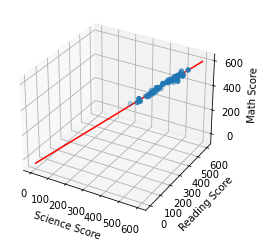

In [314]:
threedee = plt.figure().gca(projection='3d')
threedee.scatter(data['Science'], data['Reading'],\
data['Math'])
threedee.set_xlabel('Science Score')
threedee.set_ylabel('Reading Score')
threedee.set_zlabel('Math Score')
xline = np.linspace(0, 600, 600)
yline = np.linspace(0, 600, 600)
zline = xline*1.02301989 + \
yline*0.0516567-38.99549267679242
threedee.plot3D(xline, yline, zline, 'red')
plt.show()